# SELECT ~ FROM ~ WHERE

## 관계 연산자, 논리 연산자의 사용

In [ ]:
SELECT mem_id, mem_name 
    FROM member
    WHERE height <= 162;
    
SELECT mem_id, mem_name 
    FROM member
    WHERE height >= 165 AND mem_number > 6;
    
SELECT mem_id, mem_name 
    FROM member
    WHERE height >= 165 OR mem_number > 6;

## BETWEEN ~ AND 

In [ ]:
SELECT mem_id, mem_name 
    FROM member
    WHERE height >= 163 AND height <=165;
    
SELECT mem_id, mem_name 
    FROM member
    WHERE height BETWEEN 163 AND 165;

## IN

In [ ]:
SELECT mem_name, addr
    FROM member
    WHERE addr = '경기' OR addr = '전남' OR addr = '경남';

## LIKE
- 문자열의 일부 글자 검색 

In [ ]:
# 제일 앞 글자가 '우'이고 그 뒤는 무엇이든(%) 허용 
SELECT * 
    FROM member
    WHERE mem_name LIKE '우%' 
    
# 글자와 매치
SELECT *
    FROM member
    WHERE mem_name LIKE '__핑크';

# 서브쿼리

- SELECT 안에 또 다른 SELECT 

In [ ]:
SELECT height FROM member WHERE mem_name = '에이핑크';
SELECT mem_name, height FROM member WHERE height > 164;

# 서브쿼리
SELECT mem_name, height FROM member 
    WHERE height > (SELECT height FROM member WHERE mem_name = '에이핑크');

# SELECT 심화

**ORDER BY**
- 결과의 정렬

**LIMIT**
- 결과의 개수 제한

**DISTINCT**
- 중복된 데이터 제거

**GROUP BY**
- 지정한 열의 데이터들을 같은 데이터끼리는 묶어서 결과를 추출
- 집계 함수와 함께 사용 
- HAVING 절을 통해 조건식 추가 

## ORDER BY 절

- 결과의 값이나 개수에 대해서는 영향 미치지 않음
- 결과가 출력되는 순서를 조절
- 기본값 ASC(오름차순)
- DESC : 내림차순 

In [ ]:
SELECT 열_이름
    FROM 테이블_이름
    WHERE 조건식
    GROUP BY 열_이름
    HAVING 조건식
    ORDER BY 열_이름
    LIMIT 숫자

In [ ]:
SELECT mem_id, mem_name, debut_date
    FROM member
    ORDER BY debut_date;

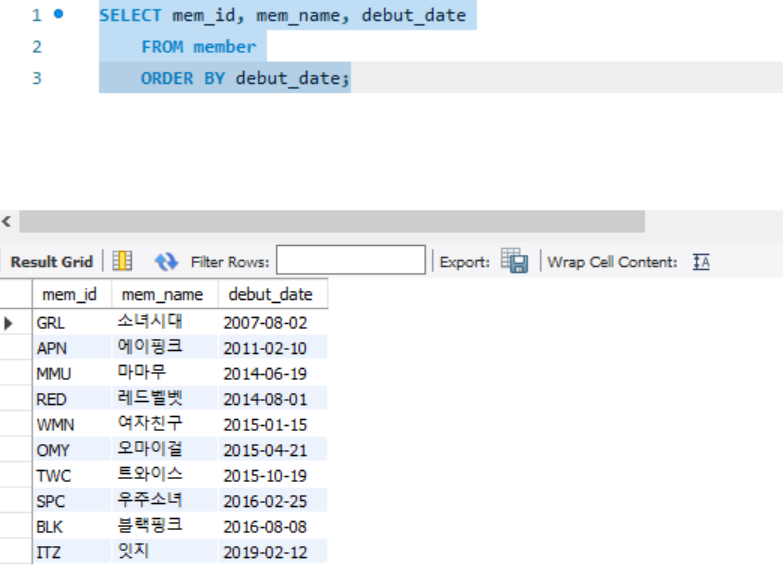

In [ ]:
SELECT mem_id, mem_name, debut_date
    FROM member
    ORDER BY debut_date DESC;

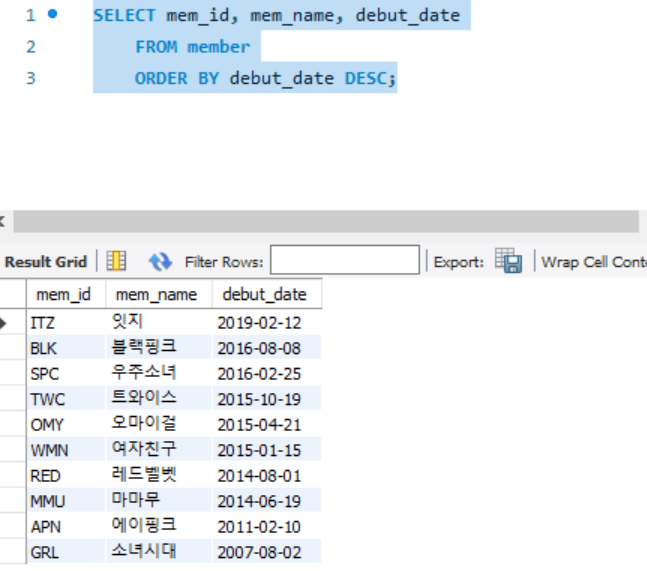

In [ ]:
# WHERE 절이 ORDER BY 절보다 뒤에 나오면 에러
SELECT mem_id, mem_name, debut_date, height
    FROM member
    WHERE height >= 164         
    ORDER BY height DESC;

# 정렬 기준 여러개
SELECT mem_id, mem_name, debut_date, height
    FROM member
    WHERE height >= 164         
    ORDER BY height DESC, debut_date ASC;

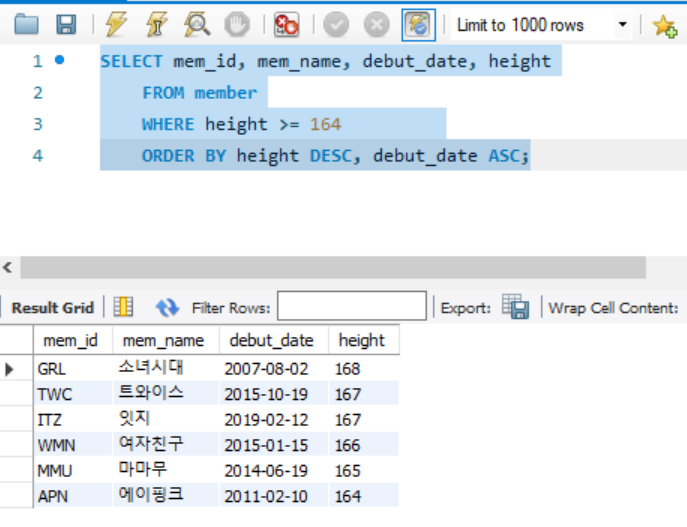

## LIMIT

- 출력하는 개수 제한

In [ ]:
SELECT *
    FROM member
    LIMIT 3;
    
# 정렬 후 몇 건만 추출
SELECT *
    FROM member
    ORDER BY debut_date
    LIMIT 3;
    
# 중간부터 출력 
# 3번째부터 2건만 
SELECT mem_name, height
    FROM member
    ORDER BY height DESC
    LIMIT 3, 2;

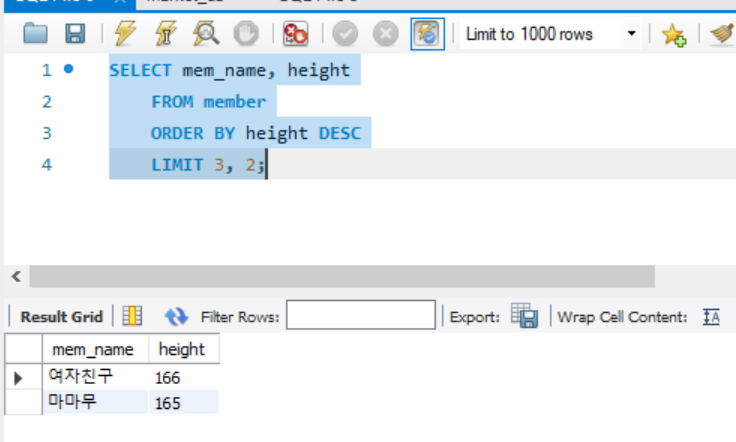

## DISTINCT

- 조회된 결과에서 중복된 데이터를 1개만 남김
- 열 이름 앞에 DISTINCT를 써주면 됨

In [ ]:
SELECT addr FROM member;

# 정렬
SELECT addr FROM member ORDER BY addr;

# 중복 제거
SELECT DISTINCT addr FROM member;

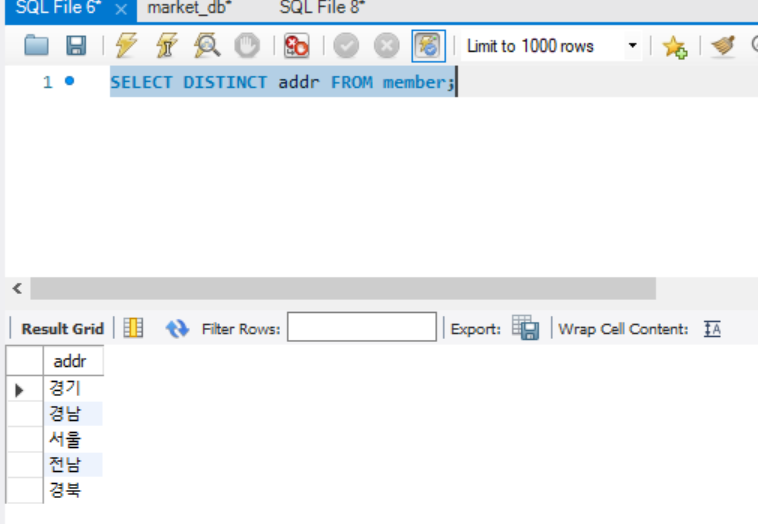

## GROUP BY

- 그룹으로 묶어주는 역할
- 함께 주로 사용되는 집계 함수
1. SUM
2, AVG
3. MIN
4. MAX
5. COUNT
6. COUNT(DISTINCT) : 행의 개수를 세고 중복은 1개만 인정 

In [ ]:
SELECT mem_id, amount 
    FROM buy 
    GROUP BY mem_id 
    
# SUM
SELECT mem_id, SUM(amount) 
    FROM buy 
    GROUP BY mem_id 
    
# 별칭 사용
# 큰따옴표 권장
SELECT mem_id "회원 아이디", SUM(amount) "총 구매 개수"
    FROM buy 
    GROUP BY mem_id 
    
SELECT mem_id "회원 아이디", SUM(price*amount) "총 구매 금액"
    FROM buy
    GROUP BY mem_id;
    
# AVG
SELECT AVG(amount) "평균 구매 개수" FROM buy;

# 그룹별 평균 구매 개수
SELECT mem_id, AVG(amount) "평균 구매 개수" 
    FROM buy
    GROUP BY mem_id;
    
# COUNT 
SELECT COUNT(*) FROM member;

# 연락처가 있는 회원
SELECT COUNT(phone1) "연락처가 있는 회원"
    FROM member;

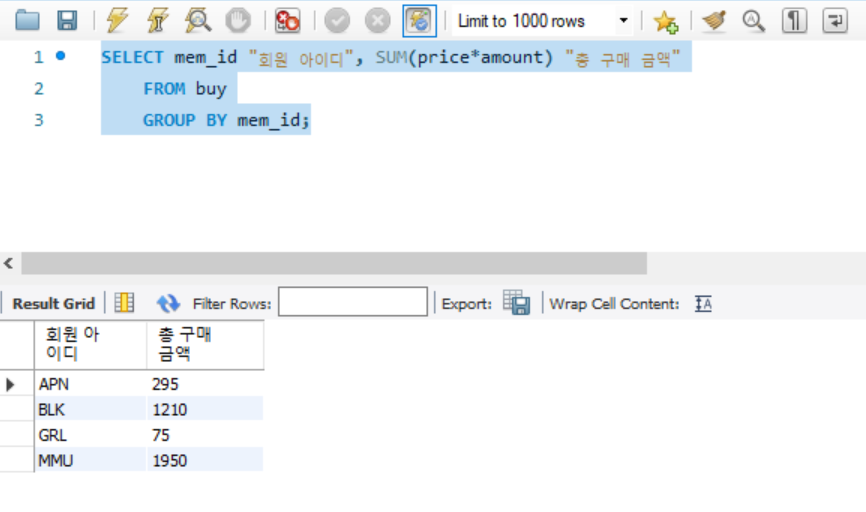

## Having 절

- WHERE과 비슷한 개념으로 조건을 제한
- 집계 함수에 대해서 조건을 제한
- GROUP BY 절 다음에 나와야 함

In [ ]:
SELECT mem_id "회원 아이디", SUM(price*amount) "총 구매 금액"
    FROM buy
    GROUP BY mem_id
    HAVING SUM(price*amount) > 1000;

# ORDER BY 추가
SELECT mem_id "회원 아이디", SUM(price*amount) "총 구매 금액"
    FROM buy
    GROUP BY mem_id
    HAVING SUM(price*amount) > 1000
    ORDER BY SUM(price*amount) DESC;

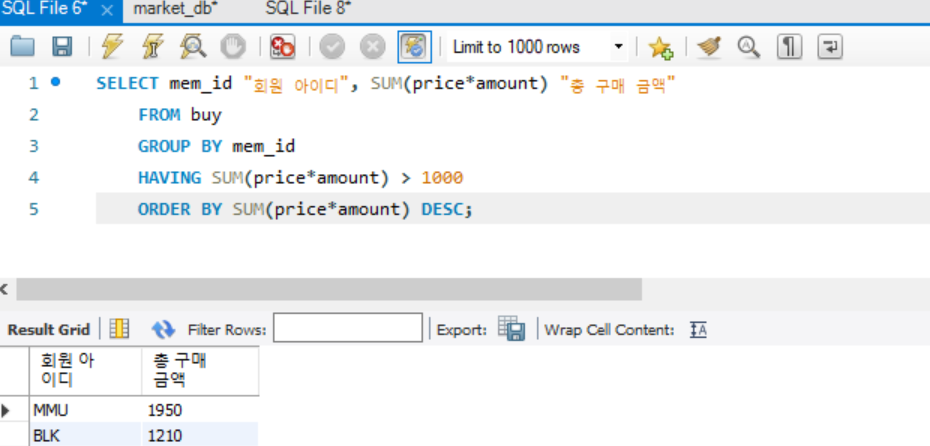